# Statoil/C-CORE Iceberg Classifier Challenge

- [Competition Link : Statoil/C-CORE Iceberg Classifier Challenge](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge)

![img](./asset/img.png)

이 challenge는 빙하와 배를 구분하는 문제입니다. 따라서 **binary image classification** 문제죠!

(TMI) 캐나다 동쪽 해안에서는 표류하는 빙하가 큰 위험이 된다고 합니다. 그래서 많은 연구기관, 기업들이 이 위험을 피할 방법을 찾고있고, 위성 사진을 지속적을 모니터링 하고있다고 합니다. 이러한 이유로 Statoil이라는 국제 에너지 기업과 C-CORE 이라는 위성 기업이 이 competition을 주최하게 되었다고 합니다. 이들이 제공한 위성 사진을 가지고 배(ship)와 빙하(iceberg)를 잘 구분해내는 모델을 세워봅시다!

이미지 분류 문제이기 때문에 CNN 모델을 생각해볼 수 있을 것 같습니다. 

## 1. 데이터 불러오기

가장 먼저 데이터를 다운받아서 `./data` 폴더에 넣어줍시다. 데이터는 `json` 파일 형식으로 되어있습니다.

In [1]:
# 필요한 모듈 import
import os
from os.path import join as opj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [2]:
data_path = os.path.dirname(os.path.abspath('__file__'))
data_path += r'/asset/'

train_path = data_path + 'train.json'
test_path = data_path + 'test.json'

In [3]:
# 데이터 불러오기.
train = pd.read_json(train_path)
test = pd.read_json(test_path)

In [6]:
train

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0
...,...,...,...,...,...
1599,04e11240,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",na,0
1600,c7d6f6f8,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",na,0
1601,bba1a0f1,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",na,0
1602,7f66bb44,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",na,0


In [4]:
test

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874
...,...,...,...,...
8419,16ee9b50,"[-25.082357, -26.71583, -24.599827, -25.082571...","[-25.860718, -23.29442, -25.860861, -25.334354...",34.795500
8420,5a599eb7,"[-21.031391143798828, -21.031391143798828, -21...","[-23.755836486816406, -23.755836486816406, -23...",32.246683
8421,df30d6dd,"[-28.609278, -26.514626, -26.514679, -26.83061...","[-28.609278, -29.437183, -30.35239, -31.375494...",39.503200
8422,18af95b1,"[-27.068821, -27.068892, -23.970854, -22.38730...","[-29.991381, -29.163599, -24.886002, -27.71266...",33.638000


In [5]:
print(train.shape)
print(test.shape)

(1604, 5)
(8424, 4)


하나하나 살펴봅시다!

- `id` : 말 그대로 id가 되겠네요.
- `band_1`, `band_2` : 이미지를 flatten 한 값입니다. band 하나마다 75X75 픽셀 값이 들어있다고 합니다. 
    - `band_1`은 HH(transmit/receive horizontally), `band_2`는 HV(transmit horizontally and receive vertically)로 얻어진 데이터 라고 합니다. 
    - flatten 되어있는 값들을 75X75로 되돌리고 처리하면 좋겠네요!
- `inc_angle` : 어떤 각도에서 이미지를 촬영했는지를 나타냅니다. 
- `is_iceberg` : 빙하인지 배인지 여부. 1이면 빙하, 0이면 배가 되겠네요. 우리의 **target data!!**
    - 당연하지만 test 데이터에서는 주어지지 않는 값이겠죠?

자세한 설명은 [홈페이지](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge/data)에 나와있습니다. 


## 2. EDA & 데이터 전처리 하기

데이터를 그럼 살펴보며 전처리를 해봅시다!

### 결측치 확인

가장 먼저 결측치가 있는지 한번 확인해볼까요?

In [6]:
train.isnull().sum()

id            0
band_1        0
band_2        0
inc_angle     0
is_iceberg    0
dtype: int64

In [7]:
test.isnull().sum()

id           0
band_1       0
band_2       0
inc_angle    0
dtype: int64

이렇게 보면 전부 값이 들어있는 것 같습니다. 그런데 홈페이지세어 `inc_angle` 칼럼에 missing data는 `na`라고 표시되어있다고 합니다. 이 값을 그럼 `NaN`으로 바꿔줍시다.

In [8]:
train['inc_angle'] = train['inc_angle'].replace('na', 0)
train['inc_angle'] = train['inc_angle'].astype(float).fillna(0.0)

train[train['inc_angle'] == 0]

,id,band_1,band_2,inc_angle,is_iceberg
101,f9209504,"[-13.271194, -12.898959, -14.867657, -16.54327...","[-22.941357, -23.540695, -24.41008, -24.879778...",0.0,0
126,551856d8,"[-22.102318, -23.761854, -26.414414999999998, ...","[-26.414314, -30.252075, -26.730301, -27.39882...",0.0,0
142,89842932,"[-13.514271, -11.831821, -13.580964999999999, ...","[-27.900896, -26.317339, -23.394848, -24.97853...",0.0,0
145,f76458ab,"[-17.553728, -17.245392, -17.553867, -16.85065...","[-25.305712, -24.114067, -25.832432, -25.05414...",0.0,0
176,9847a428,"[-21.199528, -20.517969, -19.016716, -18.10160...","[-21.024048, -20.852085, -22.962326, -25.46114...",0.0,0
...,...,...,...,...,...
1599,04e11240,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",0.0,0
1600,c7d6f6f8,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",0.0,0
1601,bba1a0f1,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",0.0,0
1602,7f66bb44,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",0.0,0


133개가 결측치였네요.

`test` 데이터도 마찬가지로 진행해줍시다.

In [9]:
test['inc_angle'] = test['inc_angle'].replace('na', 0)
test['inc_angle'] = test['inc_angle'].astype(float).fillna(0.0)

### 데이터 분포 확인

그럼 이번에는 iceberg와 ship이 각각 얼마나 있는지도 확인해봅시다. 

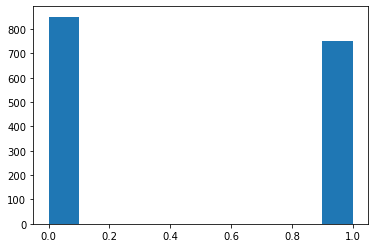

In [10]:
plt.hist(train['is_iceberg'])
plt.show()

ship이 조금 더 많네요! 그래도 이정도면 차이가 많이 큰 것은 아닌 것 같습니다. 

그럼 각 band에는 어떤 값들이 들어있을까요? 확인해봅시다.

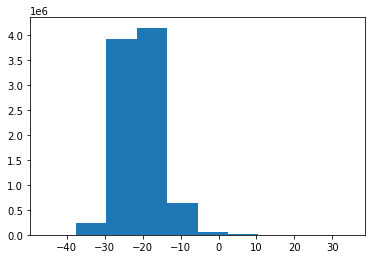

In [11]:
plt.hist(np.array(train['band_1'].tolist()).flatten())
plt.show()

-40부터 10까지의 숫자들이 있네요. 나중에 정규화 하는 것도 생각할 수 있을 것 같습니다.

`inc_angle`도 한번 생각해봅시다.

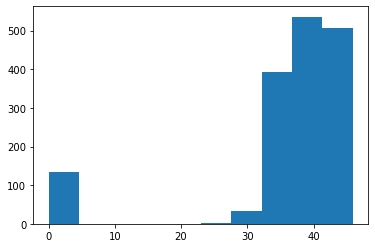

In [12]:
plt.hist(train['inc_angle'])
plt.show()

`0`은 우리가 넣어주었던 결측치 값이었습니다. 원래는 35~45 사이의 값이 일반적이네요. 나중에 이 결측치도 고려해주는 것도 방법이 될 것 같습니다.


### 이미지 데이터 전처리

그럼 이제 `band_1`과 `band_2`를 생각해봅시다.


![img](https://github.com/hongdoki/hongdoki.github.io/blob/master/assets/statoil/iceberg-easy.png?raw=true)

이 사진을 봐봅시다. HH는 `band_1`, HV는 `band_2` 입니다. Iceberg일때와 Ship일때 생긴게 약간 다릅니다. 그렇지만 구분하기 어려운 경우도 있습니다.

![img](https://github.com/hongdoki/hongdoki.github.io/blob/master/assets/statoil/iceberg-hard.png?raw=true)

이것과 같은 경우는 구분하기 힘들 것 같죠?

어쨌든 여기서 알 수 있는 것은, HH와 HV를 독립된 데이터로 생각하지 않고 합쳐서 생각해도 괜찮을 것 같다는 점입니다. 우리는 <u>두 이미지를 평균내어</u> 사용해봅시다!


원래 `75X75` 이미지였으니 원래대로 돌린 후 우리는 CNN을 사용할 것이기 때문에 **`[N, height, width, channel]`** 의 차원을 가지도록 바꿔줍시다.


In [13]:
# train 데이터 가공하기. 
X_band_1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train['band_1']])
X_band_2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train['band_2']])

# 두 band를 평균내서 train값 구하기
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis], ((X_band_1 + X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [14]:
# test도 똑같이 가공해줍니다.
X_band_test_1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])

# 두 band를 평균내서 test 값으로!
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis], X_band_test_2[:, :, :, np.newaxis], ((X_band_test_1 + X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

그럼 한번 이미지를 확인해볼까요?

In [15]:
N_ROW = 6
N_COL = 6
N = N_ROW * N_COL

icebergs = train[train['is_iceberg']==1].sample(n=N, random_state=2020)
ships = train[train['is_iceberg']==1].sample(n=N, random_state=2020)

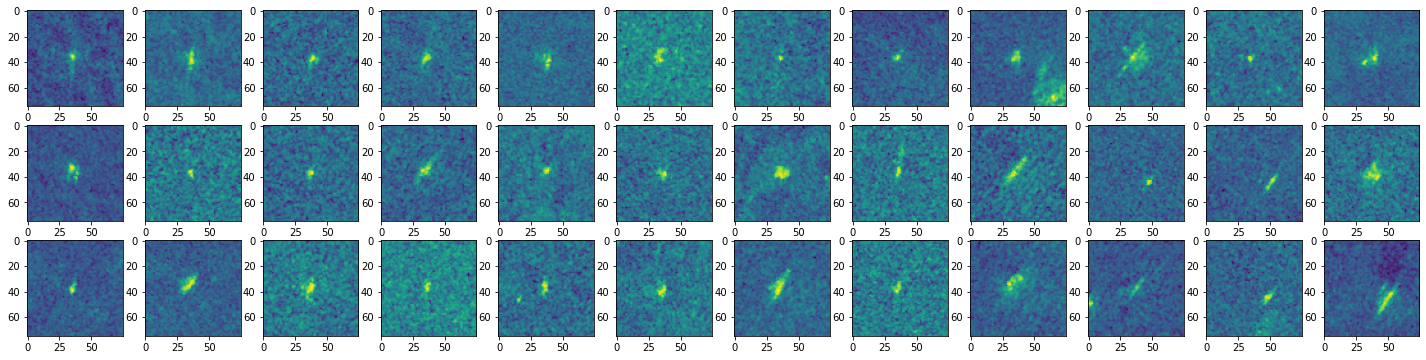

In [16]:
icebergs_img = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in icebergs['band_1']])
fig = plt.figure(1, figsize=(25, 25))
for j in range(N):
    ax = fig.add_subplot(2*N_ROW, 2*N_COL, j+1)
    ax.imshow(icebergs_img[j])
plt.show()

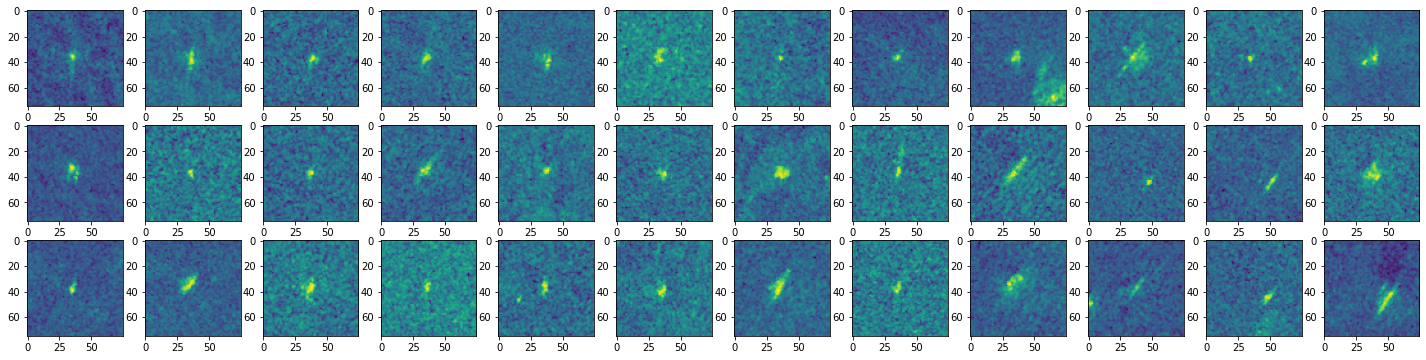

In [17]:
ships_img = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in ships['band_1']])

fig = plt.figure(1, figsize=(25, 25))
for j in range(N):
    ax = fig.add_subplot(2*N_ROW, 2*N_COL, j+1)
    ax.imshow(ships_img[j])

plt.show()

band_2에서 정보는 너무 불규칙적이네요. band_1에서의 정보가 더 유의미하겠네요. 둘을 합쳐 평균낸다는 생각은 어쩌면 좋은 선택이었을지도 모르겠습니다.



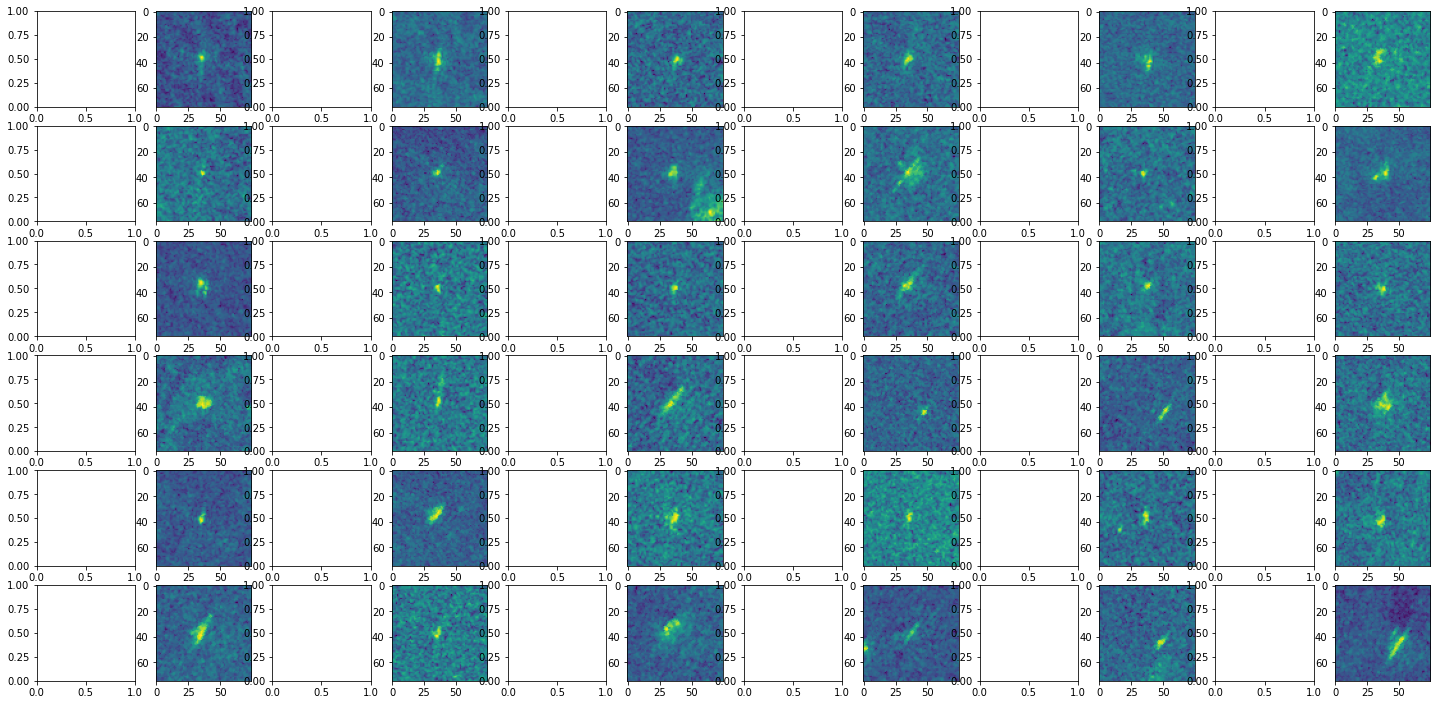

In [18]:
fig = plt.figure(1,figsize=(25,25))
for j in range(2*N):
    try:
        i = j // 2 
        b = j % 2
        ax = fig.add_subplot(2*N_ROW,2*N_COL,j+1)
        arr = np.reshape(np.array(icebergs.iloc[i,b]),(75,75))
        ax.imshow(arr)
    except:
        pass
    
plt.show()

뭔가가 잘못된 것 같지만..!!

그럼 이제 모델을 만들어봅시다! 모델은 `keras`를 활용해서 만들어봅시다.


## 3. 모델 만들기

먼저 필요한 모듈들부터 import 해줍시다.

In [32]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, Activation, GlobalMaxPooling2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [33]:
# 모델을 정의합시다.
def getModel():
    model = Sequential()
    
    #Conv Layer 1
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    
    #Conv Layer 2
    model.add(Conv2D(128, kernel_size = (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    
    #Conv Layer 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.2))
    
    #Conv Layer 4
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    
    #Flatten
    model.add(Flatten())
    
    #Dense Layer 1
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #Dense Layer 2
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #Sigmoid
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    mypotim = Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=mypotim, metrics=['accuracy'])
    model.summary()
    return model

모델을 정의했습니다!! 우리는

- 4개의 Convolution layer와
- 1개의 Flatten Layer
- 2개의 Dense Layer를 사용한 후
- Sigmoid 함수를 마지막에 사용해주었습니다.
- Optimizer는 Adam을 사용했습니다.
    - learning rate = 0.001
    - beta_1과 beta_2, epsilon, decay는 무슨 의미인지 잘 모르겠네요...

In [35]:
def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode='min')
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

callback 함수를 따로 만들어주었습니다. 얘도 무슨 의미인지 잘 모르겠네요 ^^;

In [38]:
del train['id']
train

,band_1,band_2,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0
...,...,...,...,...
1599,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",0.0000,0
1600,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",0.0000,0
1601,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",0.0000,0
1602,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",0.0000,0


In [40]:
from sklearn.model_selection import train_test_split

y = train['is_iceberg']
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y, random_state=32, train_size=0.8
)

In [41]:
model = getModel()
model.fit(X_train, y_train, 
          batch_size=24,
          epochs=10,
          verbose = 1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       1

validation set에서는 정확도가 85%, train dataset에서는 80%정도가 나오네요!

In [42]:
model.load_weights(filepath=file_path)
score = model.evaluate(X_valid, y_valid, verbose=1)

print("Validation Loss : ", score[0])
print("Validation Accuracy : ", score[1])

11/11 [==============================] - 13s 1s/step - loss: 0.3152 - accuracy: 0.8505
Validation Loss :  0.315172016620636
Validation Accuracy :  0.8504672646522522


Validation Set에서 나쁘지 않죠? 이제 test 데이터에 대해서도 예측하고 제출해봅시다.

In [46]:
pred = model.predict_proba(X_test)

In [52]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['is_iceberg'] = pred.reshape((pred.shape[0]))
submission.to_csv('sub.csv', index=False)

이제 저장된 `sub.csv` 폴더를 제출하면 끝!

![img](./asset/img2.png)

score는 약 0.26정도 나오네요. Log Loss로 계산하니 값이 작은 것이 더 좋은데 말입니다. 만약 대회에 나갔었다면 약 2500등 정도 했었겠네요. ㅎㅎ